# Рубежный контроль №1

# Лобанов Дмитрий ИУ5-61Б

# Вариант 10

# Задача 2

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.datasets import load_wine
import random

In [95]:
wine = load_wine()
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

In [96]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [98]:
for i in range(0,35):
    rand = random.randint(0, 178)
    data['alcohol'][rand] = None

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       146 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [100]:
data['target'].unique()

array([0., 1., 2.])

In [101]:
for i in range(0,35):
    rand = random.randint(0, 178)
    data['target'][rand] = None

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       146 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,146.0,13.075822,0.806032,11.03,12.4200,13.135,13.7175,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [104]:
data.isna().sum()

alcohol                         32
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                          31
dtype: int64

In [105]:
data.duplicated().sum()

0

In [106]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [107]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,NaN
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


alcohol - категориальный

target - количественный

### Категориальный

In [108]:
data['target'].unique()

array([nan,  0.,  1.,  2.])

In [109]:
data['target'].isnull().sum()

31

В столбце присутсвуют три числа, описывающие трех разных культиваторов, которыми изготовлены разные вина. В столбце также присутствуют пропуски. Возможно, они означают вина, не произведенные ни одни из данных культиваторов. В этом случае мы можем ввести четвертый тип, описывающий такие вина.

In [110]:
data['target']= data['target'].fillna(3.0)

Теперь пустые значения отсутствуют:

In [111]:
data['target'].isnull().sum()

0

### Количественный

In [112]:
data['alcohol']

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

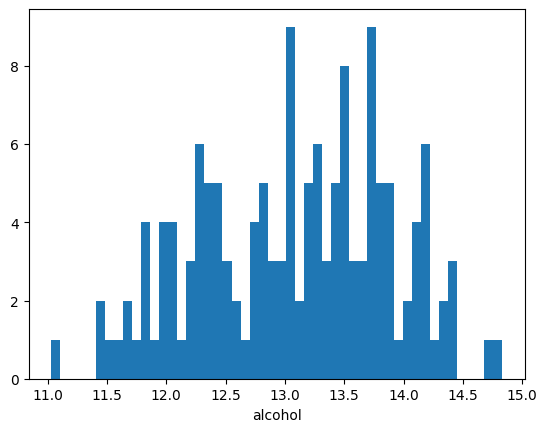

In [113]:
plt.hist(data['alcohol'], 50)
plt.xlabel('alcohol')
plt.show()

In [114]:
data['alcohol'].describe().T

count    146.000000
mean      13.075822
std        0.806032
min       11.030000
25%       12.420000
50%       13.135000
75%       13.717500
max       14.830000
Name: alcohol, dtype: float64

In [115]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['alcohol']])
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [116]:
#Стратегии заполнения
strategies=['mean', 'median', 'most_frequent']

In [117]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    filled_data = data_num_imp[mask_missing_values_only]
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [118]:
test_num_impute_col(data[['alcohol']], 'alcohol', strategies[0])

('alcohol', 'mean', 32, 13.075821917808216, 13.075821917808216)

In [119]:
test_num_impute_col(data[['alcohol']], 'alcohol', strategies[1])

('alcohol', 'median', 32, 13.135, 13.135)

In [120]:
test_num_impute_col(data[['alcohol']], 'alcohol', strategies[2])

('alcohol', 'most_frequent', 32, 13.05, 13.05)

В столбце alcohol данные распределены одномодально, можно заполнить пропуски медианным значением.

In [121]:
data['alcohol'] = data['alcohol'].fillna(data['alcohol'].median())

In [122]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,3.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


При заполнении пропусков я использовал импьютацию константным и медианным значениями.

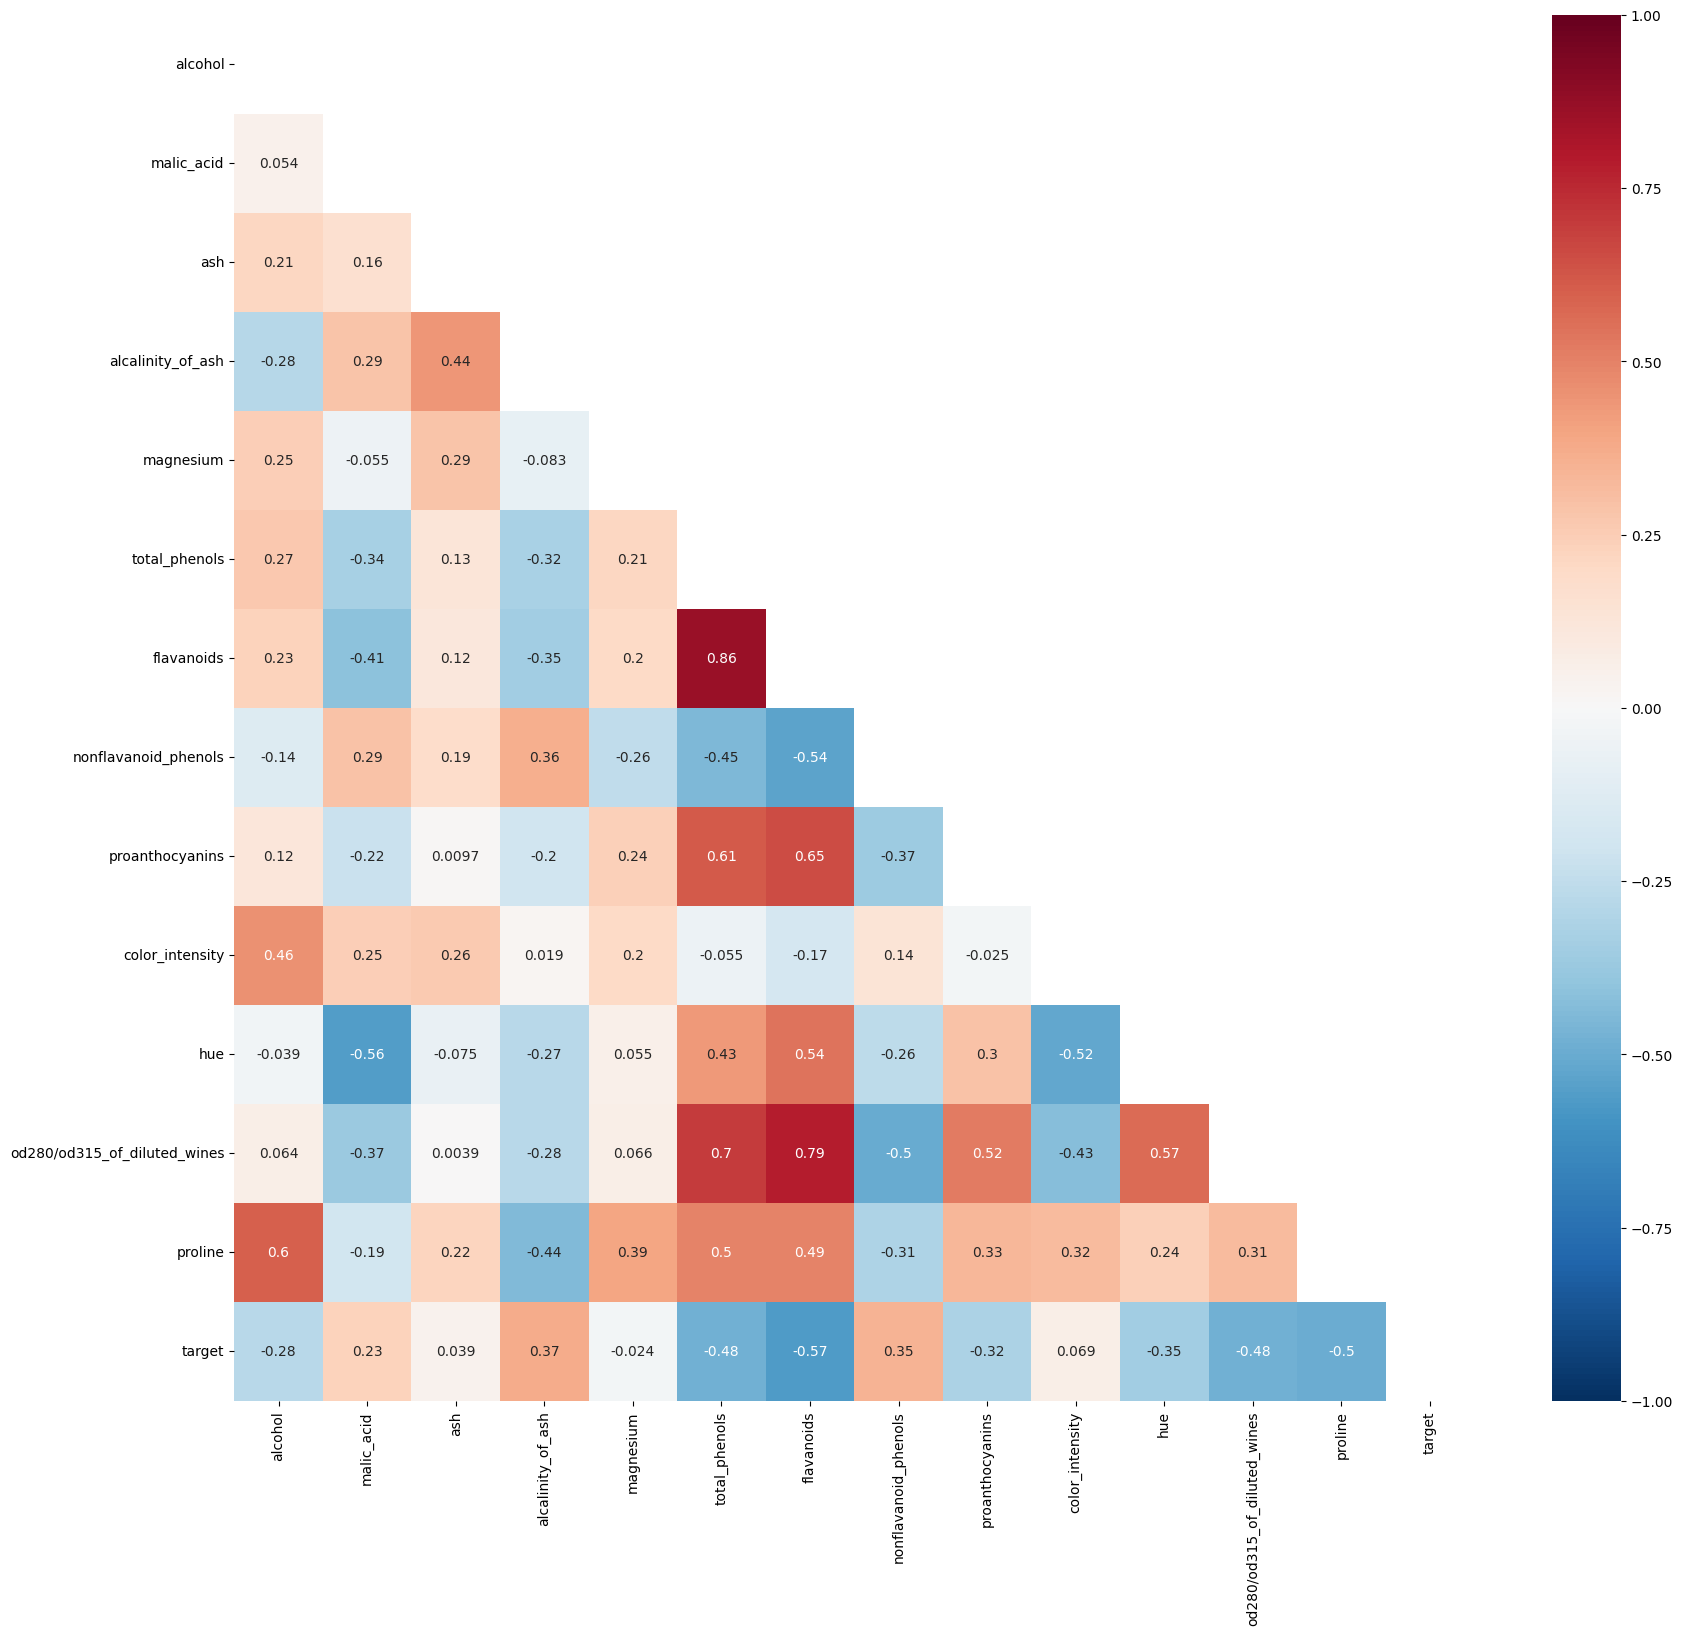

In [123]:
plt.figure(figsize = (20,18))

m =np.triu(np.ones_like(data.corr(), dtype=bool))

sns.heatmap(data.corr(), mask = m, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');

По матрице корреляции видна хорошая зависимость и корреляция целевого признака "target" с колонками "flavanoids" и "proline".

Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

В качестве примера можно решать задачу классификации и строить модель зависимости признака "target" - номер культиватора. В данном случае стоит использовать в модели признаки "flavanoids" и "proline", так как они хорошо коррелируют с целевым признаком. Однако, не стоит одновременно брать признаки "flavanoids" и "total_phenols", так они очень сильно коррелируют между собой, а это может негативно повлиять на обучение и результат данной модели. От одного из них стоит отказаться в пользу другого.

Для улучшения качества модели, возможно стоит убрать из рассмотрения слабо коррелирующие с целевым признаки колонки (например, "ash", "magnesium" и "color_intensity").

## Диаграмма рассеяния

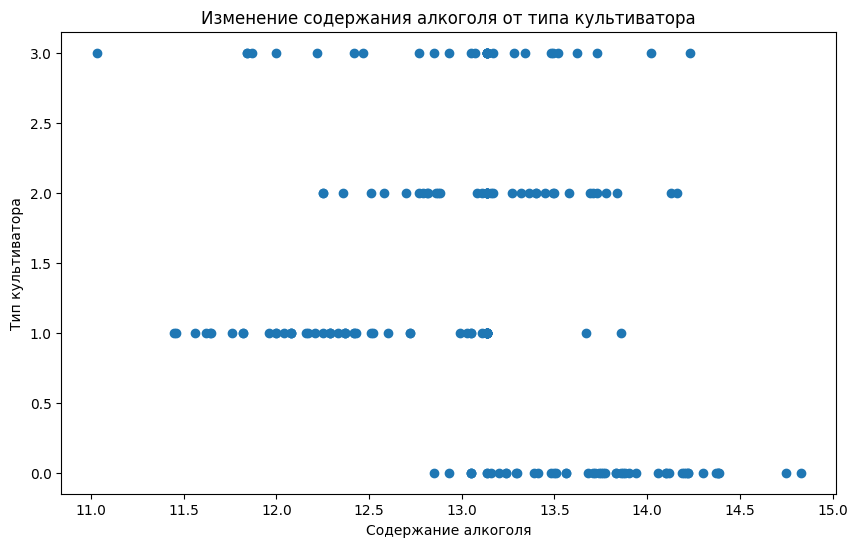

In [125]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = data['alcohol'], y = data['target'])
plt.title('Изменение содержания алкоголя от типа культиватора')
plt.xlabel("Содержание алкоголя")
plt.ylabel("Тип культиватора")

plt.show()